# Addition of two numbers using RNN

[Anyone can learn to code an LSTM-RNN in Python](https://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/)

Addition can be treated as an RNN

## Problem definition

The goal is to minimise the errors

Dimensions are as follows:

\begin{matrix}
    h_i &:& n_h & \times & 1  \\
    x_i &:& 2 & \times & 1 \\
    W_{hh} &:& n_h & \times & n_h \\
    W_{yh} &:& 1 & \times & n_h \\
    W_{hx} &:& n_h & \times & 2 \\
    b_h &:& n_h & \times & 1 \\
    b_y &:& 1 & \times & 1
\end{matrix}

The optimisation problem is

\begin{align}
    \min && Obj \\
    over && W_{hh},& W_{hx}, W_{yh}, b_h, b_y \\
    s.t. && Obj & = \frac{1}{2} \sum_i err_i^2 \\ 
        && err_i & = y_i - y_{known\, i} \\
        && y_i & = \sigma ( z_i ) \\
        && z_i & = W_{yh} \, h_{i+1} + b_y \\
        && h_{i+1} & = \sigma ( v_i )\\
        && v_i & =  W_{hh} \, h_i + W_{hx} \, x_i + b_h \\
        && h_0 & = 0
\end{align}

## Derivatives

### Derivatives of hidden state

#### wrt to $b_h$

\begin{align}
    \dfrac{\partial v_{i ,\, k}}{\partial b_{h ,\, j}} & = \dfrac{\partial }{\partial b_{h ,\, j}} \left[ \sum_n \left( W_{hh ,\, kn} \, h_{i ,\, n} \right) + \sum_l \left( W_{hx ,\, kl} \, x_{i ,\, l} \right) + b_{h ,\, k} \right] \\
    \dfrac{\partial v_{i ,\, k}}{\partial b_{h ,\, j}} & = \sum_n \left( W_{hh ,\, kn} \, \dfrac{\partial h_{i ,\, n} }{\partial b_{h ,\, j}}  \right) + \dfrac{\partial b_{h ,\, k} }{\partial b_{h ,\, j}} \\
    \dfrac{\partial v_{i ,\, k}}{\partial b_{h ,\, j}} & = \sum_n \left( W_{hh ,\, kn} \, \dfrac{\partial h_{i ,\, n} }{\partial b_{h ,\, j}}  \right) + \delta_{ij}
\end{align}

#### wrt to $W_{hx}$

\begin{align}
    \dfrac{\partial v_{i ,\, k}}{\partial W_{hx ,\, om}} & = \dfrac{\partial }{\partial W_{hx ,\, om}} \left[ \sum_n \left( W_{hh ,\, kn} \, h_{i ,\, n} \right) + \sum_l \left( W_{hx ,\, kl} \, x_{i ,\, l} \right) + b_{h ,\, k} \right] \\
    \dfrac{\partial v_{i ,\, k}}{\partial W_{hx ,\, om}} & = \sum_n \left( W_{hh ,\, kn} \dfrac{\partial  h_{i ,\, n}}{\partial W_{hx ,\, om}} \right) + \sum_l \left( \dfrac{\partial  W_{hx ,\, kl}  }{\partial W_{hx ,\, om}} x_{i ,\, l} \right) \\
    \dfrac{\partial v_{i ,\, k}}{\partial W_{hx ,\, om}} & = \sum_n \left( W_{hh ,\, kn} \dfrac{\partial  h_{i ,\, n}}{\partial W_{hx ,\, om}} \right) + x_{i ,\, m} \\
\end{align}

#### wrt to $W_{hh}$

\begin{align}
    \dfrac{\partial v_{i ,\, k}}{\partial W_{hh ,\, om}} & = \dfrac{\partial }{\partial W_{hh ,\, om}} \left[ \sum_n \left( W_{hh ,\, kn} \, h_{i ,\, n} \right) + \sum_l \left( W_{hx ,\, kl} \, x_{i ,\, l} \right) + b_{h ,\, k} \right] \\
        & = \dfrac{\partial }{\partial W_{hh ,\, om}} \left[ \sum_n \left( W_{hh ,\, kn} \, h_{i ,\, n} \right) \right] \\
        & = \sum_n \left[ \dfrac{\partial }{\partial W_{hh ,\, om}} \left( W_{hh ,\, kn} \, h_{i ,\, n} \right) \right] \\
        & = \sum_n \left( \dfrac{\partial W_{hh ,\, kn} }{\partial W_{hh ,\, om}} h_{i ,\, n} + W_{hh ,\, kn} \dfrac{\partial h_{i ,\, n} }{\partial W_{hh ,\, om}} \right) \\
        & = h_{i ,\, m}  + \sum_n \left( W_{hh ,\, kn} \dfrac{\partial h_{i ,\, n} }{\partial W_{hh ,\, om}} \right) \\
\end{align}

\begin{align}
    \dfrac{\partial h_{i+1 ,\, k}}{\partial v_{i ,\, k}} & = \dfrac{\partial }{\partial v_{i ,\, k}} \sigma ( v_{i,\, k} ) \\
        & = h_{i+1 ,\, k} \left(1 - h_{i+1 ,\, k} \right)
\end{align}

### Derivatives of output

#### wrt to $b_y$

\begin{align}
    \dfrac{\partial z_i}{\partial b_{y ,\, j}} & = \dfrac{\partial}{\partial b_{y ,\, j}} \left[ \sum_k \left( W_{yh ,\, k} \, h_{i+1 ,\, k} \right) + b_y \right] \\
        & = 1
\end{align}


\begin{align}
    \frac{ \partial err_i }{ \partial b_{y ,\, j} } & = \frac{ \partial }{\partial b_{y ,\, j}} \left[ \sigma ( z_i ) \right] \\
        & = \frac{\partial \left[ \sigma (z_i) \right] }{\partial z_i} \frac{\partial z_i}{\partial b_{y ,\, j}}  \\
        & = y_i \, (1 - y_i) \, \frac{\partial z_i}{\partial b_{y ,\, j}} \\
        & = y_i \, (1 - y_i)
\end{align}

#### wrt to $W_{hy}$

\begin{align}
    \frac{\partial z_i}{\partial W_{yh ,\, m}} & = \frac{\partial}{\partial W_{yh ,\, m}} \left[ \sum_k \left( W_{yh ,\, k} \, h_{i+1 ,\, k} \right) + b_{y ,\, i} \right] \\
        & = \sum_k \frac{\partial}{\partial W_{yh ,\, m}} \left[ \left( W_{yh ,\, k} \, h_{i+1 ,\, k} \right) + b_{y ,\, i} \right] \\
        & = \sum_k \frac{\partial}{\partial W_{yh ,\, m}} \left( W_{yh ,\, k} \, h_{i+1 ,\, k} \right) \\
        & = \sum_k \frac{\partial}{\partial W_{yh ,\, m}} \left( W_{yh ,\, k} \, h_{i+1 ,\, k} \right) \\
        & = \sum_k \left( \frac{\partial W_{yh ,\, k}}{\partial W_{yh ,\, m}} h_{i+1 ,\, k} + W_{yh ,\, k} \frac{\partial h_{i+1 ,\, k}}{\partial W_{yh ,\, m}} \right) \\
    & = \sum_k \left( \frac{\partial W_{yh ,\, k}}{\partial W_{yh ,\, m}} h_{i+1 ,\, k} + W_{yh ,\, k} \frac{\partial h_{i+1 ,\, k}}{\partial W_{yh ,\, m}} \right) \\
    & = h_{i+1 ,\, m} + \sum_k \left( W_{yh ,\, k} \frac{\partial h_{i+1 ,\, k}}{\partial W_{yh ,\, m}} \right) \\
    & = h_{i+1 ,\, m}
\end{align}

\begin{align}
    \frac{\partial err_i}{\partial W_{yh,\,m}} & = y_i \, (1 - y_i) \, \frac{\partial z_i}{\partial W_{yh ,\, m}} \\
    \frac{\partial err_i}{\partial W_{yh,\,m}} & = y_i \, (1 - y_i) h_{i+1,\,m}
\end{align}

#### wrt to $h_{i+1}$

\begin{align}
    \frac{\partial z_i}{\partial h_{i+1 ,\, j}} & = \frac{\partial}{\partial h_{i+1 ,\, j}} \left[ \sum_k \left( W_{yh ,\, k} \, h_{i+1 ,\, k} \right) + b_{y ,\, i} \right] \\
    & = W_{yh ,\, j}
\end{align}

# Implementations

In [2]:
%matplotlib inline
from ipywidgets import FloatProgress
from importlib import reload

n_hidden = 4
n_epochs = int(1e4)
alpha_param = .5
n_bits = 8

## Numpy implementation

In [2]:
import addition_RNN as my_rnn

Define a RNN with 4 hidden states and 8 input bits. Though it shouldn't need a fixed number of bits at this stage. A fixed number of bits is needed for training purposes.

In [3]:
model = my_rnn.RNN(8, n_hidden)
f = FloatProgress(min=0, max=n_epochs)
display(f)
err = model.train(n_epochs, 3, f, alpha=alpha_param)

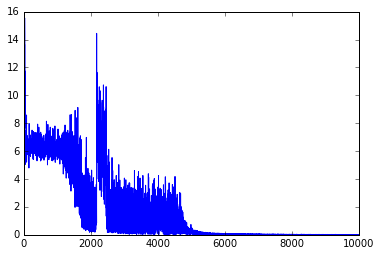

In [4]:
plt.plot(err);

In [5]:
f = FloatProgress(max=128)
display(f)
for ii in range(128):
    f.value = ii
    for jj in range(128):
        if model.predict(ii, jj) != ii + jj:
            print(ii,jj)

## Tensorflow implementation

[RNN with tensorflow](https://www.tensorflow.org/versions/r0.11/tutorials/recurrent/index.html)


https://github.com/nlintz/TensorFlow-Tutorials/blob/master/07_lstm.py

https://www.tensorflow.org/versions/r0.9/api_docs/python/nn.html#rnn

http://stackoverflow.com/questions/38189119/simple-way-to-visualize-a-tensorflow-graph-in-jupyter

In [6]:
import tensorflow as tf
import utils_tf

In [7]:
# Initialise training data
in_ = np.random.randint(0, 128, size=[n_epochs, 2, 1], dtype=np.uint8)
out_ = in_.sum(1)

in_bit = np.unpackbits(in_, axis=2)
out_bit = np.unpackbits(np.uint8(out_), axis=1)

### Understanding the BasicRNNCell

Define the graph

In [8]:
# rnn impementation - testing
tf.reset_default_graph()
rnn = tf.nn.rnn_cell.BasicRNNCell(n_hidden, activation=lambda x : x)
x = tf.placeholder(tf.float32, shape=[2, None], name='x')
h = tf.placeholder(tf.float32, shape=[4, None], name='h')
x_ = tf.transpose(x)
h_ = tf.transpose(h)
rnn_res = rnn(x_, h_)

Get the matrices of the rnn cell.

In [9]:
sess = tf.Session()
tf.initialize_all_variables().run(session=sess)
x_input = np.zeros([2, 1])
h_input = np.zeros([4, 1])
b_h = sess.run(rnn_res,
    feed_dict={
        x : np.zeros([2, 1]),
        h : np.zeros([4, 1])
    })[0].T
W_hx = np.zeros([4, 2])
for ii in range(2):
    x_input[ii, 0] = 1.
    W_hx[:, ii] = sess.run(rnn_res,
        feed_dict={
            x : x_input,
            h : np.zeros([4, 1])
        })[0][0] - b_h[:, 0]
    x_input[ii, 0] = 0.
W_hh = np.zeros([4, 4])
for ii in range(4):
    h_input[ii, 0] = 1.
    W_hh[:, ii] = sess.run(rnn_res,
    feed_dict={
        x : x_input,
        h : h_input
    })[0][0] - b_h[:, 0]
    h_input[ii, 0] = 0.

Test against the manual implementation of the RNN cell.

In [10]:
np.random.seed(100)
x_input = np.random.randn(2, 3)
h_input = np.random.randn(4, 3)
h_man = W_hh @ h_input + W_hx @ x_input + b_h
h_sess = sess.run(rnn_res,
                 feed_dict={
        x : x_input,
        h : h_input
    })[0]
print('Correctly extracted the parameters?',
      (np.allclose(h_sess, h_man.T)))

Correctly extracted the parameters? True


### Manual implementation

This defines the graph using tensorflow but the unrolling is done manually. This is basically the same as the numpy implementation but leverages `tensorflow`'s optimisation algorithms.

Define the graph

In [11]:
# Manual implementation
tf.reset_default_graph()
n_bits = 8
x = tf.placeholder(tf.float64, shape=[2, n_bits], name='x')
y = tf.placeholder(tf.float64, shape=[1, n_bits], name='y')
W_hh = tf.Variable(tf.random_normal([n_hidden, n_hidden],
            dtype=tf.float64), name='W_hh')
W_hx = tf.Variable(tf.random_normal([n_hidden, 2], 
            dtype=tf.float64), name='W_hx')
b_h = tf.Variable(tf.random_normal([n_hidden, 1], 
            dtype=tf.float64), name='b_h')
W_yh = tf.Variable(tf.random_normal([1, n_hidden],
            dtype=tf.float64), name='W_yh')
b_y = tf.Variable(tf.random_normal([1,1], 
            dtype=tf.float64), name='b_y')

y_est = [None]*n_bits
h = []
first_bit = True
for i_bit in range(n_bits)[::-1]:
    x_curr = x[:, i_bit:i_bit+1]
    if first_bit:
        h.append( tf.sigmoid( tf.matmul(W_hx, x_curr) + b_h ) )
        first_bit = False
    else:
        h.append( tf.sigmoid(
                tf.matmul(W_hh, h[-1]) +
                tf.matmul(W_hx, x_curr) + b_h 
            ) )
    y_est[i_bit] = tf.sigmoid( tf.matmul(W_yh, h[-1]) + b_y )

y_est = tf.concat(1, y_est)
    
cost = tf.reduce_mean((y_est - y)**2, name='cost')
train_op = tf.train.GradientDescentOptimizer(alpha_param).minimize(
    cost, name='cost')

#### Initialise the variables

In [12]:
sess = tf.Session()
tf.initialize_all_variables().run(session=sess)

#### Train the network

In [13]:
f = FloatProgress(min=0, max=n_epochs)
display(f)
err = []
for ii in range(n_epochs):
    if ii%100 == 0:
        f.value = ii
        err.append(sess.run(cost,
            feed_dict={x:in_bit[ii], y:out_bit[[ii]]}))
    sess.run(train_op, feed_dict={x:in_bit[ii], y:out_bit[[ii]]})

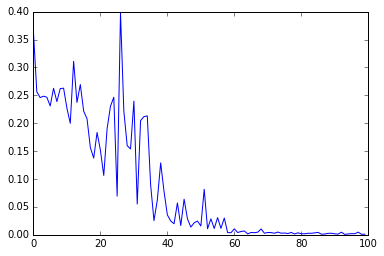

In [14]:
plt.plot(err);

In [15]:
ii = 100
out_est = sess.run(y_est, feed_dict={x:in_bit[ii]})[0]
print('inputs        ', in_bit[ii, 0])
print('              ', in_bit[ii, 1])
print('desired output', out_bit[ii])
print('actual output ', (out_est > 0.5).astype(int))

inputs         [0 0 1 0 0 0 1 1]
               [0 0 0 1 0 1 1 0]
desired output [0 0 1 1 1 0 0 1]
actual output  [0 0 1 1 1 0 0 1]


### RNN implementation

This uses the `rnn_cell` and `rnn` functionality provided by `tensorflow`.

In [16]:
# rnn impementation
tf.reset_default_graph()
rnn = tf.nn.rnn_cell.BasicRNNCell(n_hidden, 
                                  activation=tf.sigmoid)
x = tf.placeholder(tf.float32, shape=[2, n_bits], name='x')
y = tf.placeholder(tf.float32, shape=[1, n_bits], name='y')
xt = tf.transpose(x)
x_split = tf.split(0, n_bits, xt)[::-1]
h_list, _ = tf.nn.rnn(rnn, x_split, dtype=tf.float32)
h = tf.transpose(tf.concat(0, h_list[::-1]))
W_yh = tf.Variable(tf.random_normal([1, n_hidden], 
                                    dtype=tf.float32))
b_y = tf.Variable(tf.random_normal([1, 1], dtype=tf.float32))
y_est = tf.sigmoid(tf.matmul(W_yh, h) + b_y)
cost = tf.reduce_mean((y_est - y)**2, name='cost')
train_op = tf.train.GradientDescentOptimizer(0.5).minimize(
    cost, name='train')

In [17]:
sess = tf.Session()
tf.initialize_all_variables().run(session=sess)

#### Train the network

In [18]:
f = FloatProgress(min=0, max=n_epochs)
display(f)
err = []
for ii in range(n_epochs):
    if ii%100 == 0:
        f.value = ii
        err.append(sess.run(cost,
            feed_dict={x:in_bit[ii], y:out_bit[[ii]]}))
    sess.run(train_op, feed_dict={x:in_bit[ii], y:out_bit[[ii]]})

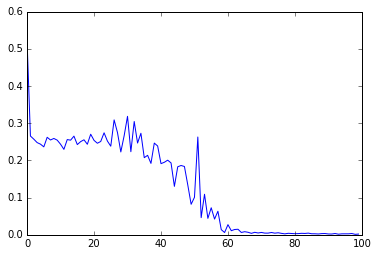

In [19]:
plt.plot(err)

In [20]:
ii = 101
out_est = sess.run(y_est, feed_dict={x:in_bit[ii]})[0]
print('inputs        ', in_bit[ii, 0])
print('              ', in_bit[ii, 1])
print('desired output', out_bit[ii])
print('actual output ', (out_est > 0.5).astype(int))

inputs         [0 0 1 0 0 1 1 1]
               [0 0 0 1 1 1 1 1]
desired output [0 1 0 0 0 1 1 0]
actual output  [0 1 0 0 0 1 1 0]


In [28]:
utils.show_graph(tf.get_default_graph().as_graph_def())